### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency
import itertools

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.feature_selection import RFE

import joblib

pd.set_option("display.max_columns", None)
import warnings

warnings.filterwarnings("ignore")


### Loading the dataset

In [2]:
df = pd.read_csv("train.csv")
df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


### Drop meaningless columns from the data frame
Since each value in it is unique, we select the first two columns and delete them. Because one of them is a property created by assigning the index as a column when converting the dataset to csv format, and the other is the ID codes of the customers. These don't make sense for us when creating the model, so we delete them.


In [3]:
df = df.drop(df.iloc[:,[0, 1]], axis = 1)

### A little information about columns in dataframe

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

### Check the content of the columns and convert them to real data types

Some of the numeric columns in this data frame actually have categorical representations. They can give us difficulties in analyzing the data. It is therefore essential to selectively convert them to category type. Because, for example, if you assign these columns as numerical and you want to look at charts like pairplot, you will not get any meaningful information.

In [5]:
categorical_indexes = list(range(6, 20))
df.iloc[:,categorical_indexes] = df.iloc[:,categorical_indexes].astype('object')

In [6]:
df["Gender"] = df["Gender"].astype("object")
df["Customer Type"] = df["Customer Type"].astype("object")
df["Type of Travel"] = df["Type of Travel"].astype("object")
df["Class"] = df["Class"].astype("object")


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  object 
 7   Departure/Arrival time convenient  103904 non-null  object 
 8   Ease of Online booking             103904 non-null  object 
 9   Gate location                      103904 non-null  object 
 10  Food and drink                     103904 non-null  object 
 11  Online boarding                    1039

### Checking and filling null values

In [8]:
df.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [9]:
df["Arrival Delay in Minutes"] = df["Arrival Delay in Minutes"].fillna(df["Arrival Delay in Minutes"].mean())

### Dataset description

In [10]:
df.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,14.815618,15.178678
std,15.114964,997.147281,38.230901,38.640909
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,843.000000,0.000000,0.000000
75%,51.000000,1743.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


In [11]:
df["Departure Delay in Minutes"].value_counts()

Departure Delay in Minutes
0      58668
1       2948
2       2274
3       2009
4       1854
       ...  
426        1
465        1
321        1
692        1
337        1
Name: count, Length: 446, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  object 
 7   Departure/Arrival time convenient  103904 non-null  object 
 8   Ease of Online booking             103904 non-null  object 
 9   Gate location                      103904 non-null  object 
 10  Food and drink                     103904 non-null  object 
 11  Online boarding                    1039

### Exploratory Data Analysis (EDA)

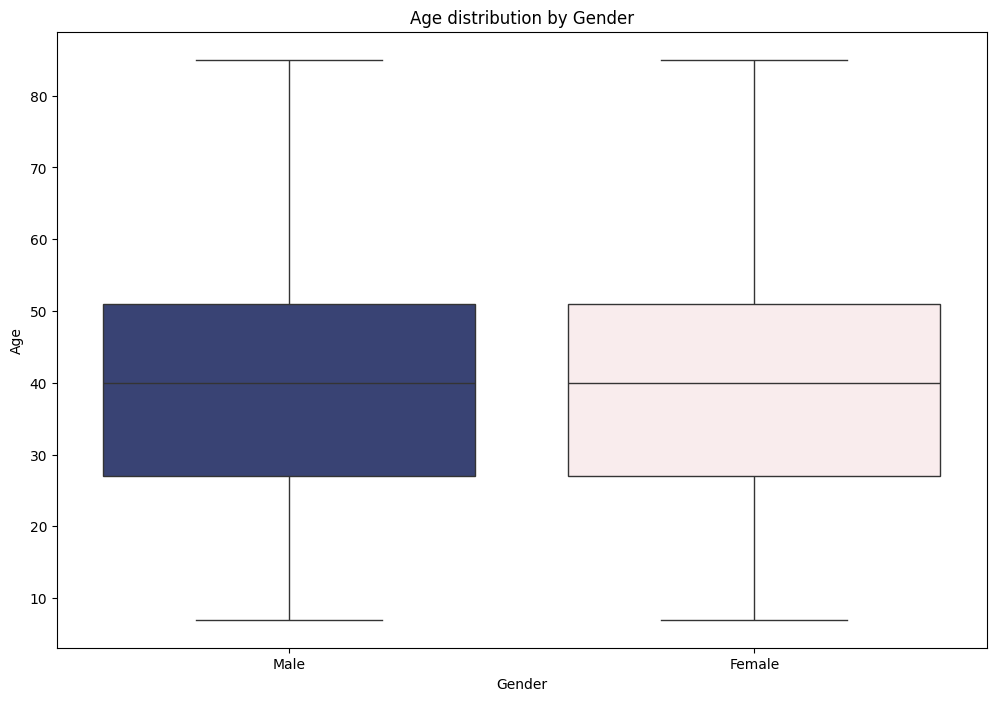

In [13]:
my_pal = {"Male": "#2F3C7E", "Female": "#FBEAEB"}
plt.figure(figsize=(12,8))
sns.boxplot(x="Gender", y="Age", data=df, palette=my_pal)
plt.title("Age distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Age")
plt.show()

From this we can conclude that the age range of passengers of different gender groups is almost the same.

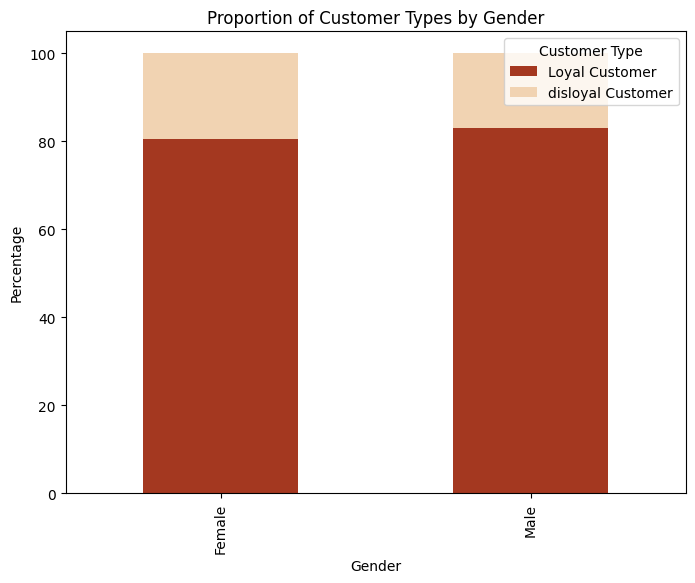

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

customer_type_gender = pd.crosstab(df['Gender'], df['Customer Type'], normalize='index') * 100

customer_type_gender.plot(kind='bar', stacked=True, figsize=(8, 6), color=['#A43820', '#F1D3B2'])
plt.title('Proportion of Customer Types by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.legend(title='Customer Type')
plt.show()


Even by a small margin, these results suggest that women are more unfaithful customers. This can be directly related to satisfaction status.

In [15]:
customer_type_gender

Customer Type,Loyal Customer,disloyal Customer
Gender,,
Female,80.524210,19.475790
Male,82.976728,17.023272


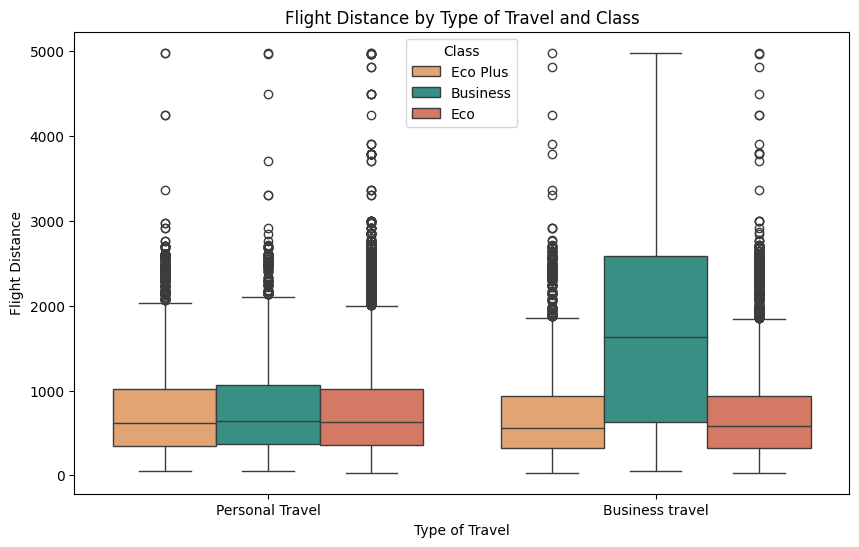

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

custom_palette = {'Business': '#2a9d8f', 'Eco': '#e76f51', 'Eco Plus': '#f4a261'}

plt.figure(figsize=(10, 6))
sns.boxplot(x='Type of Travel', y='Flight Distance', hue='Class', data=df, palette=custom_palette)
plt.title('Flight Distance by Type of Travel and Class')
plt.xlabel('Type of Travel')
plt.ylabel('Flight Distance')
plt.legend(title='Class')
plt.show()


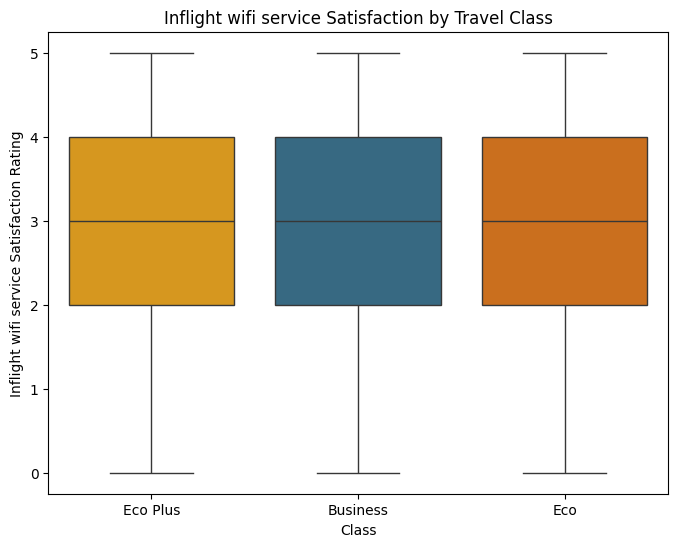

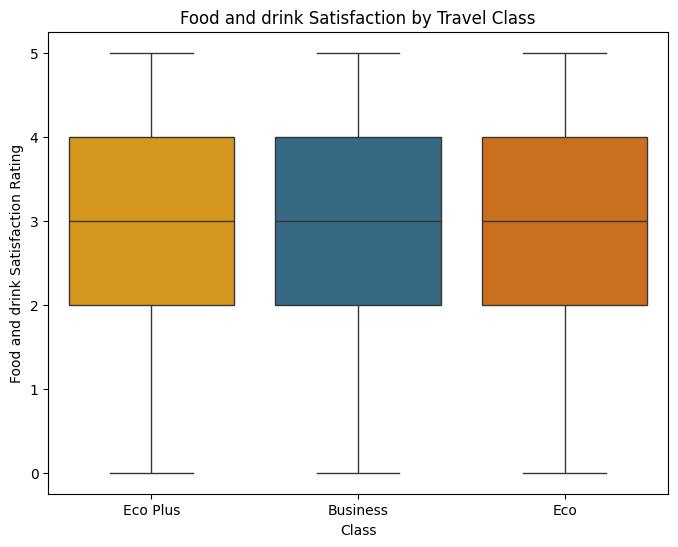

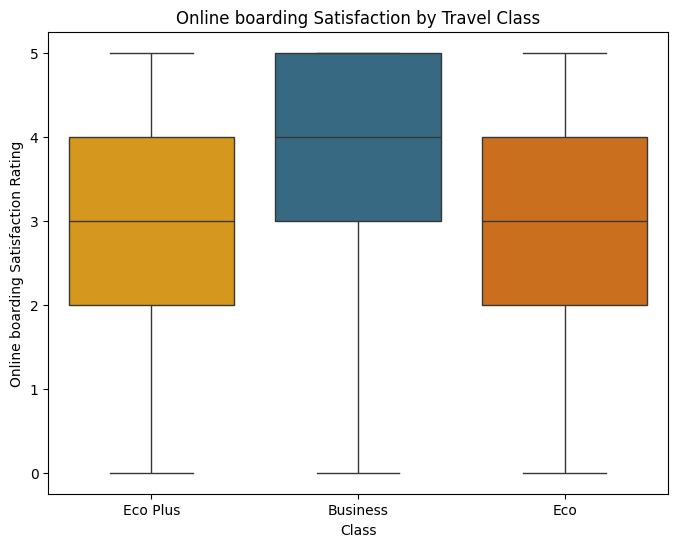

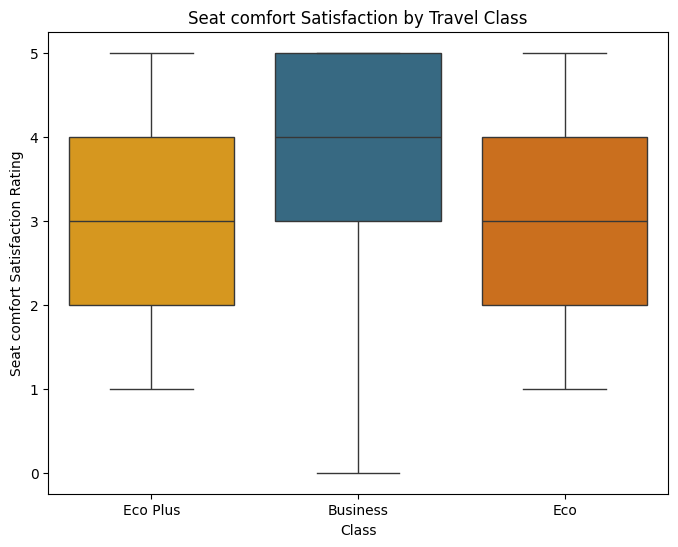

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

custom_palette = {'Business': '#2a6d8f', 'Eco': '#e76d01', 'Eco Plus': '#f4a100'}

service_columns = ['Inflight wifi service', 'Food and drink', 'Online boarding', 'Seat comfort']

for service in service_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Class', y=service, data=df, palette=custom_palette)
    plt.title(f'{service} Satisfaction by Travel Class')
    plt.xlabel('Class')
    plt.ylabel(f'{service} Satisfaction Rating')
    plt.show()


Although the travel classes are the same in 'Inflight wifi service' and 'Food and drink' scoring. Higher travel classes (such as Business) have better ratings for 'Online boarding' and 'Seat comfort'.

### Separation of columns in the dataset according to data type.

In [18]:
num_col = list(df.select_dtypes(include="number").columns)
cat_col = list(df.select_dtypes(include="object").columns)[:-1]
target = "satisfaction"

### Correlation analysis

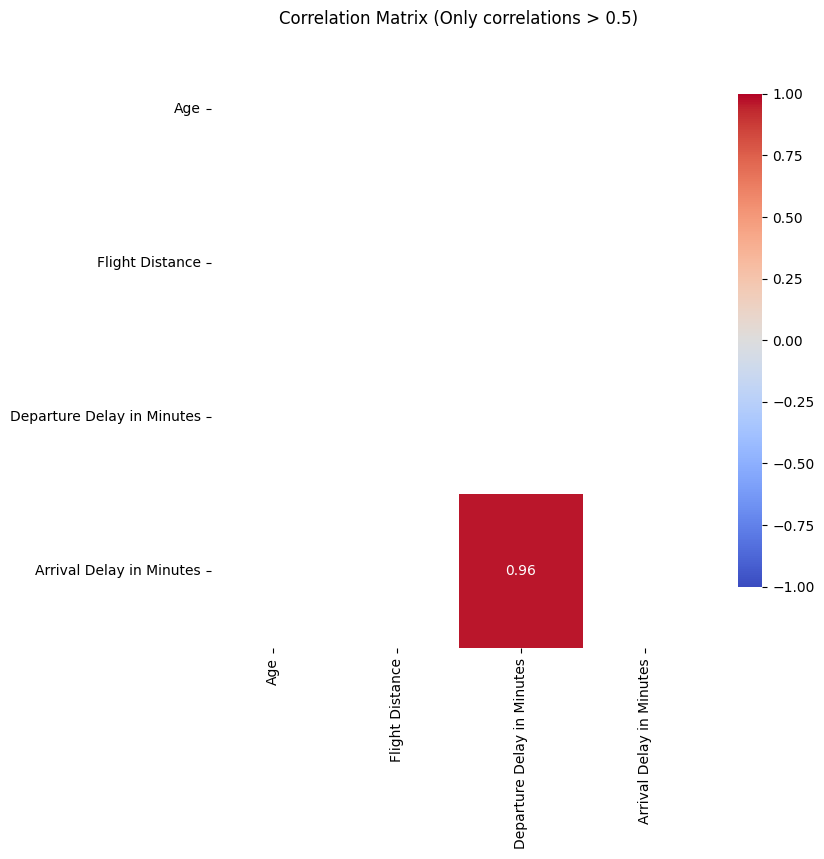

In [19]:
correlation_matrix = df[num_col].corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

filtered_corr = correlation_matrix.where((correlation_matrix > 0.5) | (correlation_matrix < -0.5))

plt.figure(figsize=(8, 8))
sns.heatmap(filtered_corr, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f", cbar_kws={"shrink": .8})
plt.title('Correlation Matrix (Only correlations > 0.5)')
plt.show()

In [20]:
import numpy as np

def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat) + 1
    y_mean = np.mean(measurements)
    y_within_cat_mean = [np.mean(measurements[fcat == i]) for i in range(cat_num)]
    n_within_cat = [np.sum(fcat == i) for i in range(cat_num)]
    numerator = np.sum(n_within_cat * (y_within_cat_mean - y_mean) ** 2)
    denominator = np.sum((measurements - y_mean) ** 2)
    return np.sqrt(numerator / denominator)

def eta_squared_numeric_vs_target(df, numeric_cols, target_col):
    results = {}
    for col in numeric_cols:
        eta_sq = correlation_ratio(df[target_col], df[col])
        results[col] = eta_sq
    return results

eta_squared_results = eta_squared_numeric_vs_target(df, num_col, target)
print(eta_squared_results)


{'Age': 0.1371673049634225, 'Flight Distance': 0.2987797857998874, 'Departure Delay in Minutes': 0.05049421026123571, 'Arrival Delay in Minutes': 0.05749681505762395}


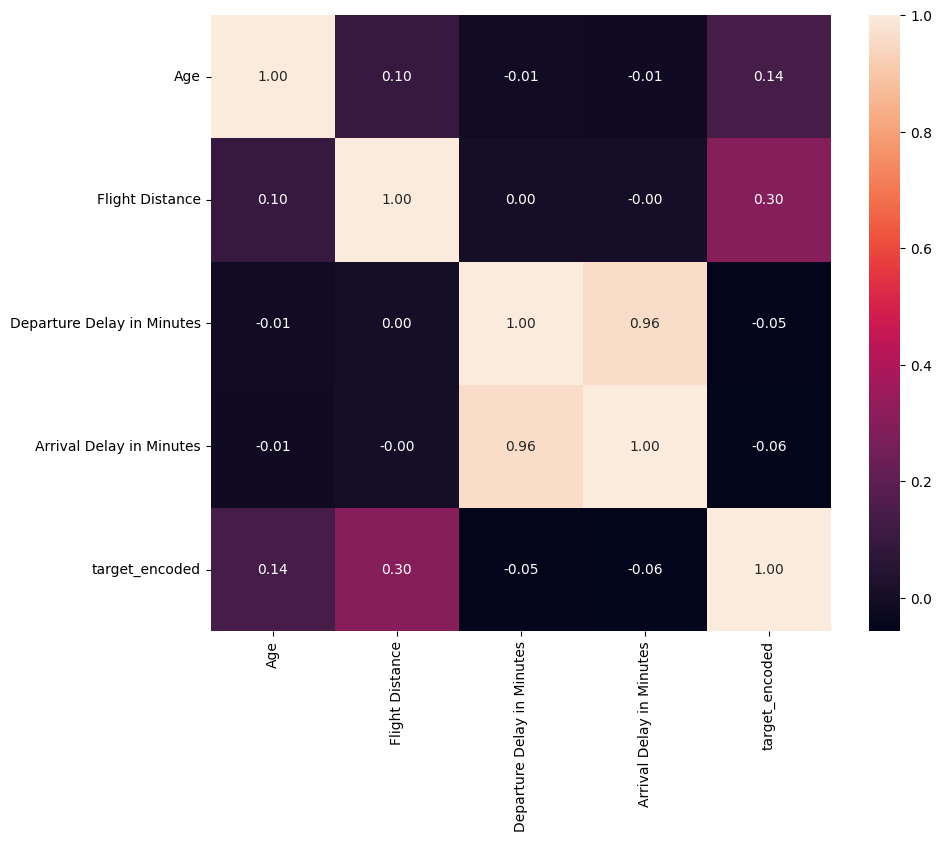

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

num_col.append('target_encoded')


df['target_encoded'] = df[target].map({'satisfied': 1, 'neutral or dissatisfied': 0})

correlation_matrix = df[num_col].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.show()


'Departure Delay in Minutes' and 'Arrival Delay in Minutes' We remove both of these columns due to the weak relationship they show with the Target value and the correlation between them.

In [22]:
num_col.remove('target_encoded')
num_col.remove('Arrival Delay in Minutes')
num_col.remove('Departure Delay in Minutes')

In [23]:
for col in cat_col:
    print(df[col].value_counts())
    print('----------------------')

Gender
Female    52727
Male      51177
Name: count, dtype: int64
----------------------
Customer Type
Loyal Customer       84923
disloyal Customer    18981
Name: count, dtype: int64
----------------------
Type of Travel
Business travel    71655
Personal Travel    32249
Name: count, dtype: int64
----------------------
Class
Business    49665
Eco         46745
Eco Plus     7494
Name: count, dtype: int64
----------------------
Inflight wifi service
3    25868
2    25830
4    19794
1    17840
5    11469
0     3103
Name: count, dtype: int64
----------------------
Departure/Arrival time convenient
4    25546
5    22403
3    17966
2    17191
1    15498
0     5300
Name: count, dtype: int64
----------------------
Ease of Online booking
3    24449
2    24021
4    19571
1    17525
5    13851
0     4487
Name: count, dtype: int64
----------------------
Gate location
3    28577
4    24426
2    19459
1    17562
5    13879
0        1
Name: count, dtype: int64
----------------------
Food and drink
4   

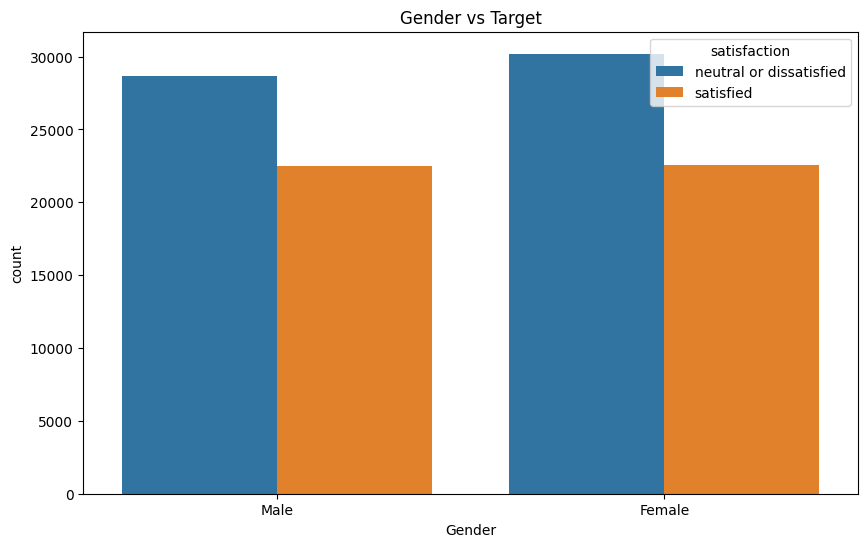

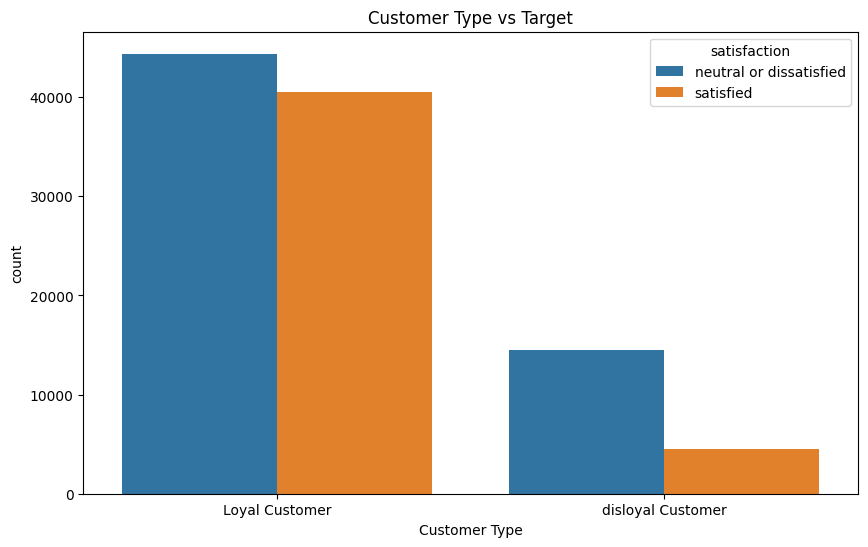

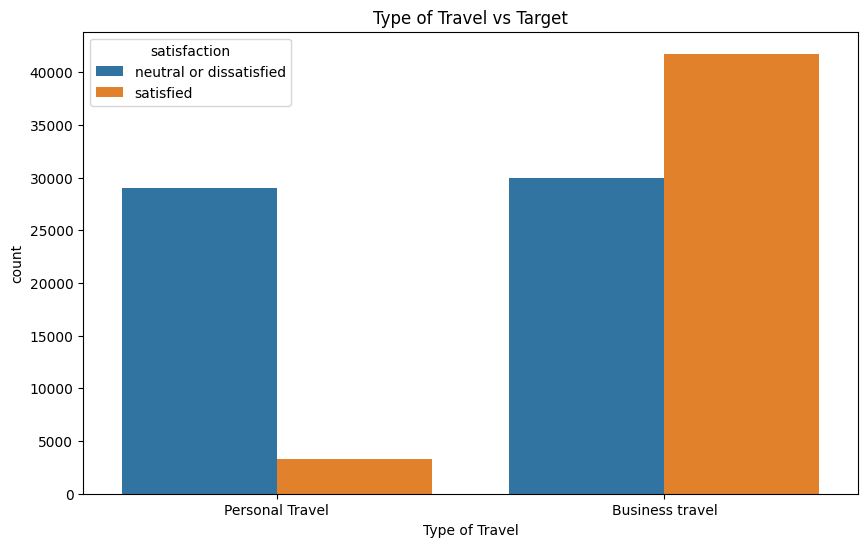

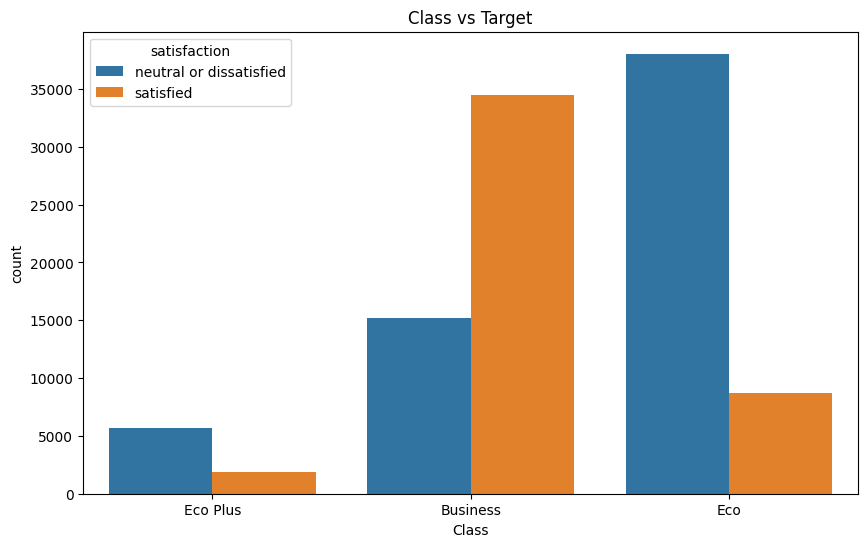

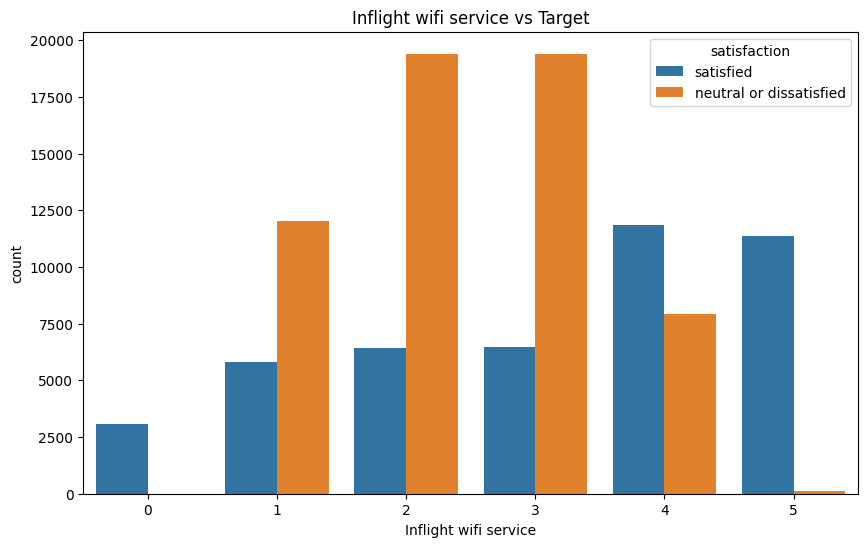

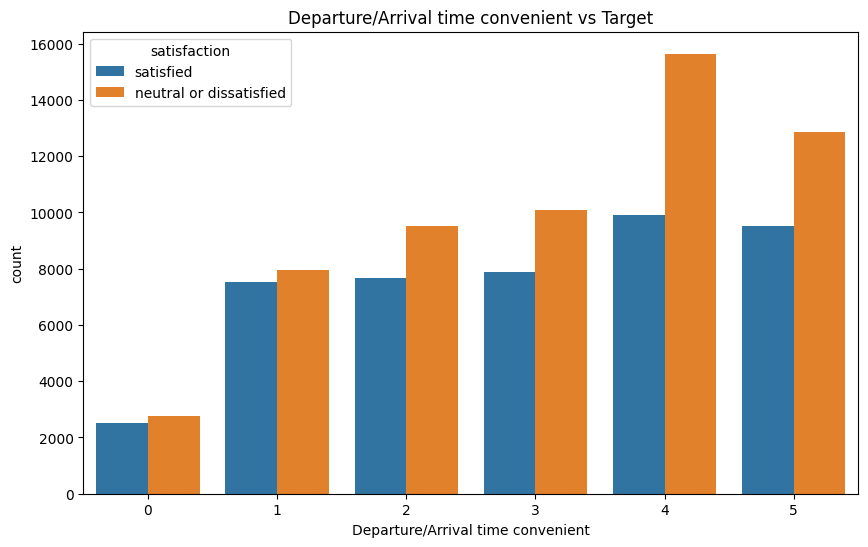

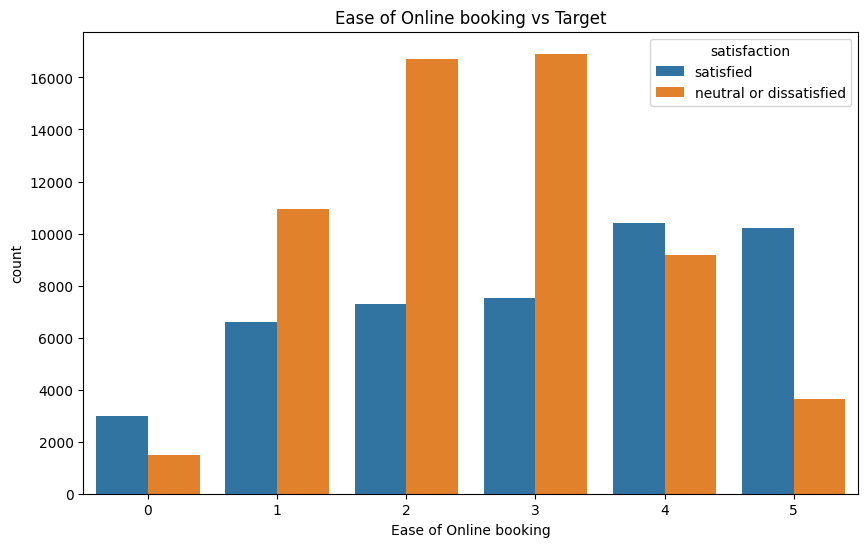

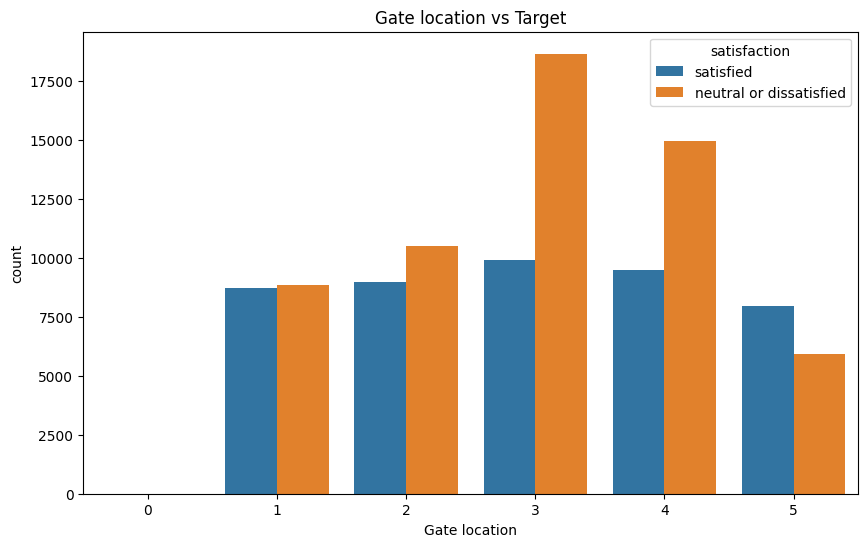

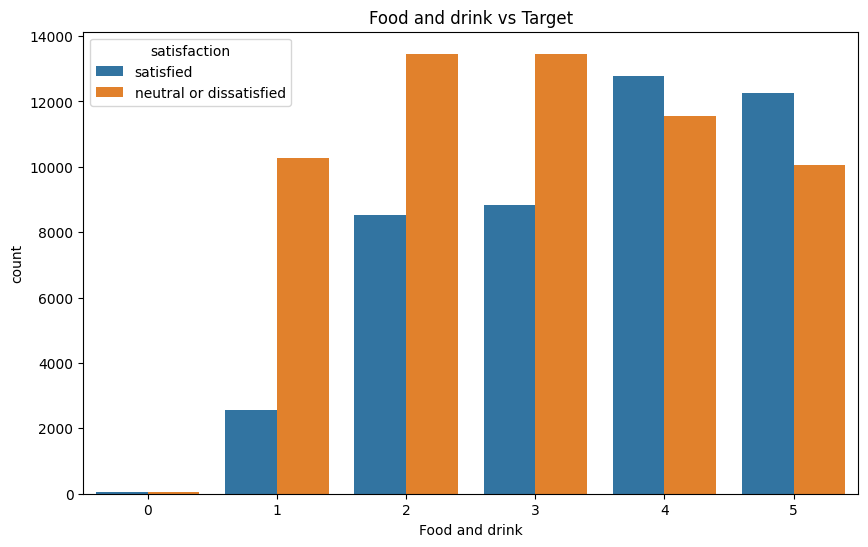

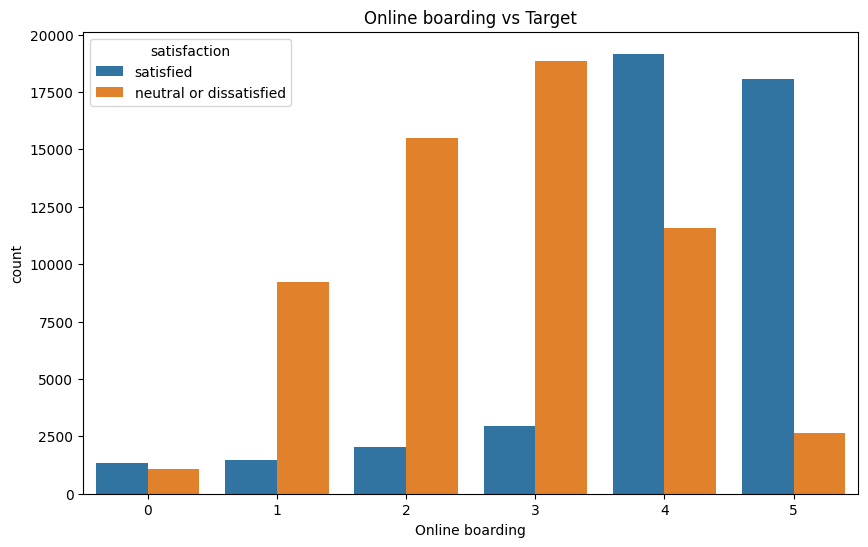

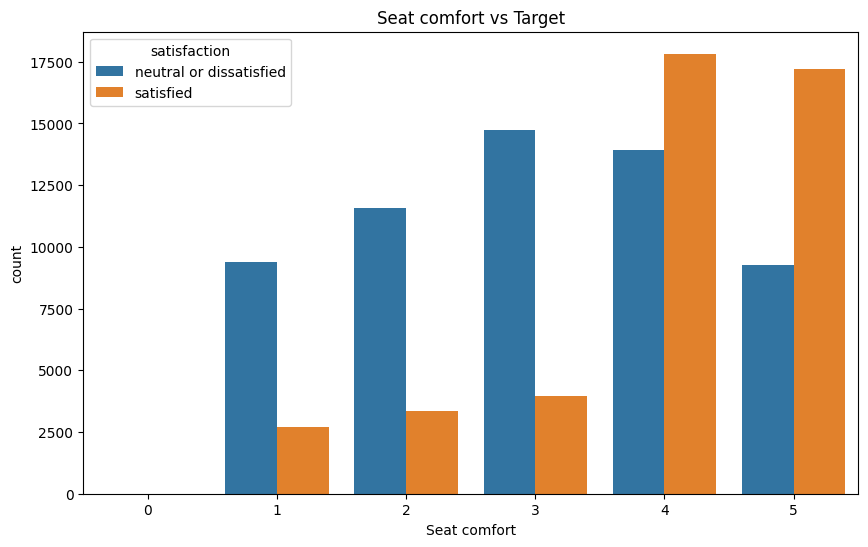

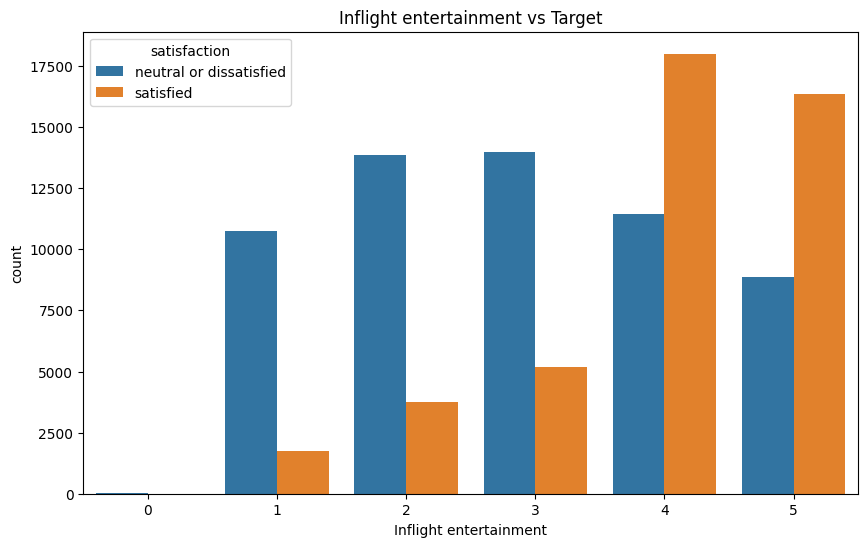

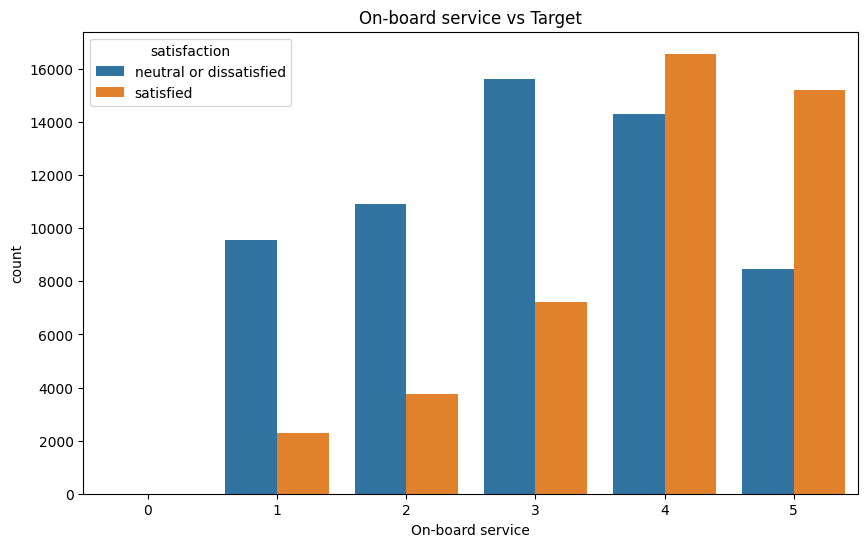

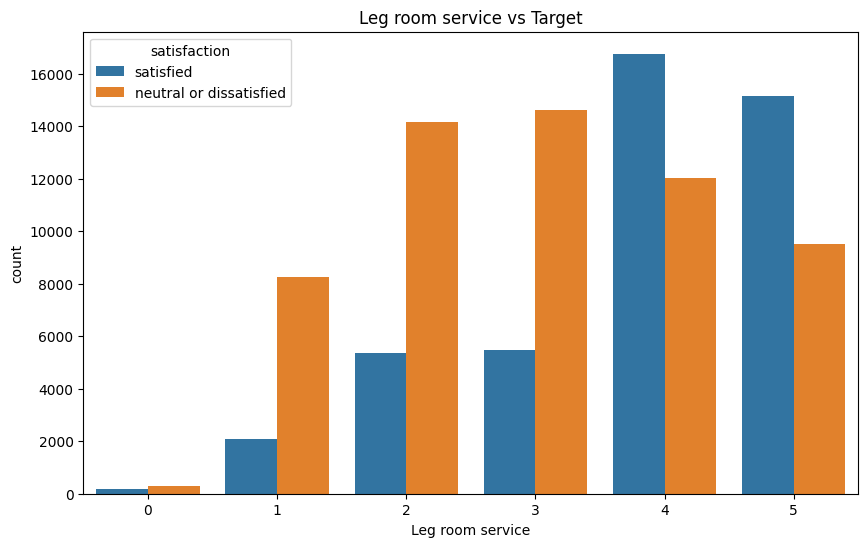

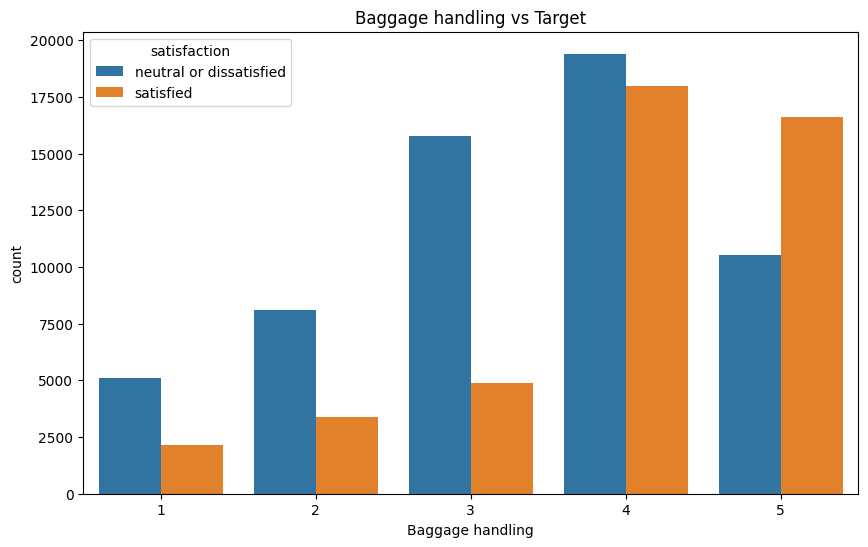

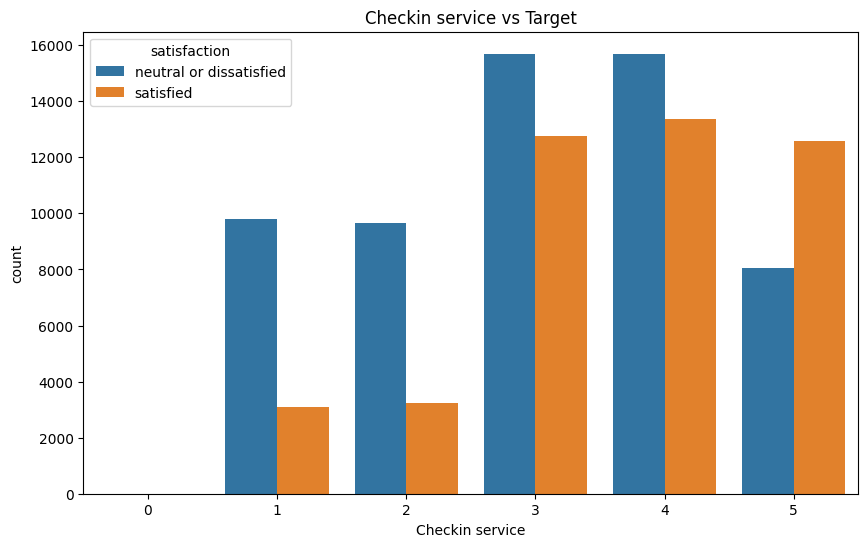

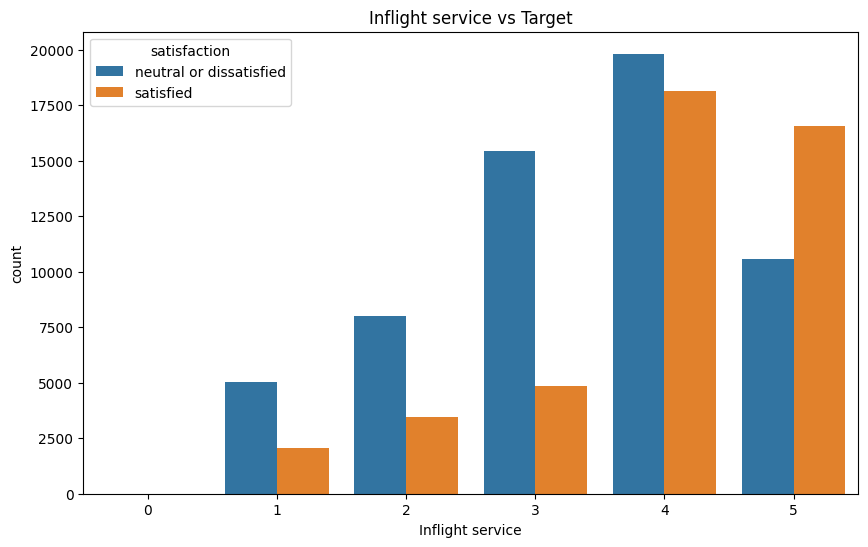

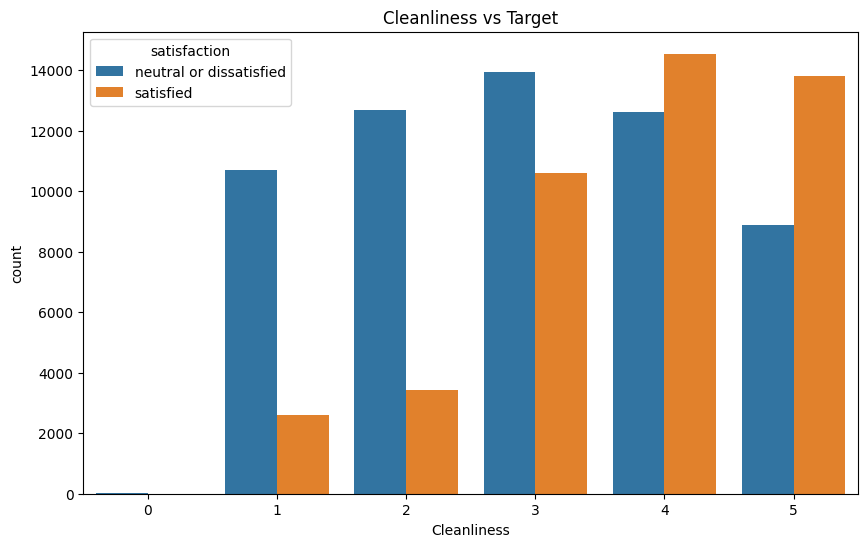

In [24]:
for col in cat_col:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue=target, data=df)
    plt.title(f'{col} vs Target')
    plt.show()

### Correlation between each of categorical features and target variable

In [25]:
chi_square_result_with_target = {}

for col in cat_col:

    contingency_table = pd.crosstab(df[col], df[target])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi_square_result_with_target[(col, target)] = p

chi_square_df = pd.DataFrame(chi_square_result_with_target.items(), columns=["Columns_Pair", "P-value"])

significant_results_with_target = chi_square_df[chi_square_df["P-value"] < 0.05]

significant_results_with_target


,Columns_Pair,P-value
0,"(Gender, satisfaction)",8.496755e-05
1,"(Customer Type, satisfaction)",0.000000e+00
2,"(Type of Travel, satisfaction)",0.000000e+00
3,"(Class, satisfaction)",0.000000e+00
4,"(Inflight wifi service, satisfaction)",0.000000e+00
5,"(Departure/Arrival time convenient, satisfaction)",2.897692e-95
6,"(Ease of Online booking, satisfaction)",0.000000e+00
7,"(Gate location, satisfaction)",0.000000e+00
8,"(Food and drink, satisfaction)",0.000000e+00
9,"(Online boarding, satisfaction)",0.000000e+00


In [26]:
cramer_v_results = []

def cramers_v(chi2, n, min_dim):
    return np.sqrt(chi2 / (n * min_dim))

for index, row in significant_results_with_target.iterrows():
    col1, target = row['Columns_Pair']
    contingency_table = pd.crosstab(df[col1], df[target])

    chi2, _, _, _ = chi2_contingency(contingency_table)

    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape) - 1
    cramer_v_value = cramers_v(chi2, n, min_dim)

    cramer_v_results.append({
        'Column Pair': (col1, target),
        'P-Value': row['P-value'],
        'Cramér\'s V': cramer_v_value
    })

cramer_v_df_with_target = pd.DataFrame(cramer_v_results)

cramer_v_df_with_target

,Column Pair,P-Value,Cramér's V
0,"(Gender, satisfaction)",8.496755e-05,0.012192
1,"(Customer Type, satisfaction)",0.000000e+00,0.187613
2,"(Type of Travel, satisfaction)",0.000000e+00,0.448979
3,"(Class, satisfaction)",0.000000e+00,0.504750
4,"(Inflight wifi service, satisfaction)",0.000000e+00,0.525530
5,"(Departure/Arrival time convenient, satisfaction)",2.897692e-95,0.065887
6,"(Ease of Online booking, satisfaction)",0.000000e+00,0.316489
7,"(Gate location, satisfaction)",0.000000e+00,0.154911
8,"(Food and drink, satisfaction)",0.000000e+00,0.223780
9,"(Online boarding, satisfaction)",0.000000e+00,0.618526


### Correlation between categorical variables.

In [27]:
chi_square_result = {}

for col1, col2 in itertools.combinations(cat_col, 2):

    contingency_table = pd.crosstab(df[col1], df[col2])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi_square_result[(col1, col2)] = p

chi_square_df = pd.DataFrame(chi_square_result.items(), columns=["Columns_Pair", "P-value"])

significant_results = chi_square_df[chi_square_df["P-value"] < 0.05]

significant_results


,Columns_Pair,P-value
0,"(Gender, Customer Type)",1.606315e-24
1,"(Gender, Type of Travel)",2.639771e-02
2,"(Gender, Class)",1.193399e-04
3,"(Gender, Inflight wifi service)",3.570851e-02
4,"(Gender, Departure/Arrival time convenient)",2.657051e-02
...,...,...
148,"(Baggage handling, Inflight service)",0.000000e+00
149,"(Baggage handling, Cleanliness)",0.000000e+00
150,"(Checkin service, Inflight service)",0.000000e+00
151,"(Checkin service, Cleanliness)",0.000000e+00


In [28]:
cramer_v_results = []

def cramers_v(chi2, n, min_dim):
    return np.sqrt(chi2 / (n * min_dim))

for index, row in significant_results.iterrows():
    col1, col2 = row['Columns_Pair']
    contingency_table = pd.crosstab(df[col1], df[col2])
    chi2, _, _, _ = chi2_contingency(contingency_table)

    n = contingency_table.sum().sum()
    min_dim = min(contingency_table.shape) - 1
    cramer_v_value = cramers_v(chi2, n, min_dim)

    cramer_v_results.append({
        'Column Pair': (col1, col2),
        'P-Value': row['P-value'],
        'Cramér\'s V': cramer_v_value
    })

cramer_v_df = pd.DataFrame(cramer_v_results)

cramer_v_df[cramer_v_df["Cramér's V"] > 0.60]

,Column Pair,P-Value,Cramér's V
60,"(Inflight wifi service, Ease of Online booking)",0.0,0.680853
134,"(Inflight entertainment, Cleanliness)",0.0,0.667199


In [29]:
cat_col.remove("Ease of Online booking")
cat_col.remove("Cleanliness")

In [30]:
print(f'{num_col}-->{len(num_col)}\n {cat_col}-->{len(cat_col)}')

['Age', 'Flight Distance']-->2
 ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service']-->16


In [31]:
final_df = df[num_col+cat_col+[target]]

In [32]:
num_col+cat_col

['Age',
 'Flight Distance',
 'Gender',
 'Customer Type',
 'Type of Travel',
 'Class',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service']

In [33]:
final_df

,Age,Flight Distance,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,satisfaction
0,13,460,Male,Loyal Customer,Personal Travel,Eco Plus,3,4,1,5,3,5,5,4,3,4,4,5,neutral or dissatisfied
1,25,235,Male,disloyal Customer,Business travel,Business,3,2,3,1,3,1,1,1,5,3,1,4,neutral or dissatisfied
2,26,1142,Female,Loyal Customer,Business travel,Business,2,2,2,5,5,5,5,4,3,4,4,4,satisfied
3,25,562,Female,Loyal Customer,Business travel,Business,2,5,5,2,2,2,2,2,5,3,1,4,neutral or dissatisfied
4,61,214,Male,Loyal Customer,Business travel,Business,3,3,3,4,5,5,3,3,4,4,3,3,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,192,Female,disloyal Customer,Business travel,Eco,2,1,3,2,2,2,2,3,1,4,2,3,neutral or dissatisfied
103900,49,2347,Male,Loyal Customer,Business travel,Business,4,4,4,2,4,5,5,5,5,5,5,5,satisfied
103901,30,1995,Male,disloyal Customer,Business travel,Business,1,1,3,4,1,5,4,3,2,4,5,5,neutral or dissatisfied
103902,22,1000,Female,disloyal Customer,Business travel,Eco,1,1,5,1,1,1,1,4,5,1,5,4,neutral or dissatisfied


In [34]:
final_df_copy = final_df.copy()

In [35]:
final_df_copy["satisfaction"] = final_df_copy["satisfaction"].replace({"neutral or dissatisfied":0, "satisfied":1})

In [36]:
for col in cat_col:
    print(df[col].value_counts)
    print("______________________________")
    print(final_df_copy.groupby([col, 'satisfaction']).size().groupby(level=0).apply(lambda x: x / x.sum()).unstack(fill_value=0))
    print("#################################################################")

<bound method IndexOpsMixin.value_counts of 0           Male
1           Male
2         Female
3         Female
4           Male
           ...  
103899    Female
103900      Male
103901      Male
103902    Female
103903      Male
Name: Gender, Length: 103904, dtype: object>
______________________________
satisfaction          0         1
Gender Gender                    
Female Female  0.572629  0.427371
Male   Male    0.560525  0.439475
#################################################################
<bound method IndexOpsMixin.value_counts of 0            Loyal Customer
1         disloyal Customer
2            Loyal Customer
3            Loyal Customer
4            Loyal Customer
                ...        
103899    disloyal Customer
103900       Loyal Customer
103901    disloyal Customer
103902    disloyal Customer
103903       Loyal Customer
Name: Customer Type, Length: 103904, dtype: object>
______________________________
satisfaction                                0         1


In [37]:
final_df["On-board service"].unique()

array([4, 1, 2, 3, 5, 0], dtype=object)

In [38]:
# final_df = pd.get_dummies(data=final_df, columns=cat_col, dtype="int64", drop_first=True)

In [39]:
X = final_df.drop("satisfaction", axis=1)
y = final_df[["satisfaction"]]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=final_df["satisfaction"], test_size=0.2, random_state=42)

In [41]:
# ss = StandardScaler()
# def scaling(data):
#     for col in num_col:
#         data[col] = ss.fit_transform(data[[col]])
#     return data

In [42]:
X_train

,Age,Flight Distance,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service
30633,47,1521,Female,Loyal Customer,Business travel,Business,3,3,3,5,4,5,4,4,4,4,4,4
98857,35,2586,Male,disloyal Customer,Business travel,Business,3,3,4,3,3,5,3,5,5,5,5,4
80498,66,550,Female,Loyal Customer,Personal Travel,Eco,2,4,2,5,4,5,4,4,2,4,3,4
73981,26,1269,Male,disloyal Customer,Business travel,Eco,5,4,1,3,5,3,3,5,1,5,3,4
70633,48,738,Male,Loyal Customer,Personal Travel,Eco,1,5,2,4,0,4,4,5,2,4,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63485,36,368,Male,disloyal Customer,Business travel,Business,2,2,4,3,2,3,3,3,5,5,5,5
44955,46,473,Male,Loyal Customer,Business travel,Business,1,1,1,5,4,4,5,5,5,5,5,5
53762,55,135,Male,Loyal Customer,Business travel,Business,5,5,5,2,5,4,5,5,5,5,5,5
32633,33,1585,Male,disloyal Customer,Business travel,Eco,2,2,3,1,2,5,1,4,4,3,3,3


In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [44]:
preprocessor = ColumnTransformer(
    transformers = [
        ("num", StandardScaler(), num_col),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False, drop="first"), cat_col)
    ]
)

In [45]:
preprocessing_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor)
])

In [46]:
X_train_proces = preprocessing_pipeline.fit_transform(X_train)
X_test_proces = preprocessing_pipeline.transform(X_test)

In [87]:
X_test_proces

array([[-0.48877864, -0.67498161,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [-0.35656901, -0.9553216 ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.81930272, -1.0618307 ,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.96552731,  0.48556565,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.37058397, -0.70211129,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.96552731,  0.42427268,  0.        , ...,  0.        ,
         0.        ,  1.        ]])

In [48]:
# Get the feature names from the ColumnTransformer
categorical_encoder = preprocessing_pipeline.named_steps['preprocessor'].named_transformers_['cat']
onehot_encoded_cols = categorical_encoder.get_feature_names_out(cat_col)

# Combine the numerical columns with the one-hot encoded column names
all_feature_names = list(num_col) + list(onehot_encoded_cols)

X_train_data = pd.DataFrame(X_train_proces, columns=all_feature_names, index=X_train.index)
X_test_data = pd.DataFrame(X_test_proces, columns=all_feature_names, index=X_test.index)

# Check the transformed DataFrame
(X_test_data.head())


,Age,Flight Distance,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,Inflight wifi service_1,Inflight wifi service_2,Inflight wifi service_3,Inflight wifi service_4,Inflight wifi service_5,Departure/Arrival time convenient_1,Departure/Arrival time convenient_2,Departure/Arrival time convenient_3,Departure/Arrival time convenient_4,Departure/Arrival time convenient_5,Gate location_1,Gate location_2,Gate location_3,Gate location_4,Gate location_5,Food and drink_1,Food and drink_2,Food and drink_3,Food and drink_4,Food and drink_5,Online boarding_1,Online boarding_2,Online boarding_3,Online boarding_4,Online boarding_5,Seat comfort_2,Seat comfort_3,Seat comfort_4,Seat comfort_5,Inflight entertainment_1,Inflight entertainment_2,Inflight entertainment_3,Inflight entertainment_4,Inflight entertainment_5,On-board service_1,On-board service_2,On-board service_3,On-board service_4,On-board service_5,Leg room service_1,Leg room service_2,Leg room service_3,Leg room service_4,Leg room service_5,Baggage handling_2,Baggage handling_3,Baggage handling_4,Baggage handling_5,Checkin service_2,Checkin service_3,Checkin service_4,Checkin service_5,Inflight service_1,Inflight service_2,Inflight service_3,Inflight service_4,Inflight service_5
89374,-0.488779,-0.674982,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8211,-0.356569,-0.955322,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
94614,-0.819303,-1.061831,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
62313,-0.290464,-0.890009,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
41609,-0.885408,-1.090970,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [49]:
joblib.dump(preprocessing_pipeline, "pipeline.joblib")

['pipeline.joblib']

In [50]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

gb_model = GradientBoostingClassifier()
xgb_model = XGBClassifier()

In [51]:
y_train_copy = y_train["satisfaction"].replace({"satisfied":1, "neutral or dissatisfied":0})
y_test_copy = y_test["satisfaction"].replace({"satisfied":1, "neutral or dissatisfied":0})

In [213]:
# from sklearn.feature_selection import RFE
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.metrics import accuracy_score
# import numpy as np

# # Initialize the classifier
# model = GradientBoostingClassifier()

# # Set up the RFE object
# rfe = RFE(estimator=model)

# # Set up the parameter grid to search for the optimal number of features
# param_grid = {
#     'n_features_to_select': np.arange(1, X_train.shape[1] + 1)  # Try every possible number of features
# }

# # Use GridSearchCV to find the best number of features
# grid_search = GridSearchCV(estimator=rfe, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# # Fit the model
# grid_search.fit(X_train, y_train_copy)

# # Get the best number of features and score
# best_n_features = grid_search.best_params_['n_features_to_select']
# best_score = grid_search.best_score_

# print(f"Best number of features: {best_n_features}")
# print(f"Best accuracy: {best_score}")

# # Train RFE with the optimal number of features
# rfe_optimized = RFE(estimator=model, n_features_to_select=best_n_features)
# rfe_optimized.fit(X_train, y_train_copy)

# # Check the selected features
# selected_features = rfe_optimized.support_

# print(f"Selected features: {selected_features}")


In [52]:
selected_features = [ True,  True, False,  True,  True,  True,  True,  True,  True,
                   True,  True,  True, False,  True,  True,  True, False,  True,
                    True,  True,  True, False, False, False, False, False, False,
                    False, False,  True,  True,  True, False,  True, False,  True,
                    True,  True,  True,  True, False,  True, False, False, False,
                    True, False, False, False,  True, False,  True,  True, False,
                    True, False, False, False,  True, False, False,  True, False,True]

In [53]:
X_train_rfe = X_train_data[X_train_data.columns[selected_features]]
X_test_rfe = X_test_data[X_test_data.columns[selected_features]]

In [54]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif_data = pd.DataFrame()
vif_data["feature"] = X_train_rfe.columns

vif_data["VIF"] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]

vif_data = vif_data.sort_values(by="VIF", ascending=False)

print(vif_data)

                                feature       VIF
8               Inflight wifi service_3  6.779274
7               Inflight wifi service_2  5.481396
9               Inflight wifi service_4  5.312433
16                      Gate location_3  4.182522
6               Inflight wifi service_1  3.859346
4                             Class_Eco  3.795486
17                      Gate location_4  3.557811
26             Inflight entertainment_4  3.351690
15                      Gate location_2  3.303088
25             Inflight entertainment_3  3.172136
19                    Online boarding_4  3.147564
3        Type of Travel_Personal Travel  3.075602
10              Inflight wifi service_5  2.876804
20                    Online boarding_5  2.683966
14                      Gate location_1  2.591209
18                    Online boarding_3  2.571855
24             Inflight entertainment_2  2.529293
35                   Inflight service_5  2.402885
32                   Baggage handling_5  2.278431


In [55]:
vif_list = list(vif_data["feature"].values)

In [56]:
vif_list

['Inflight wifi service_3',
 'Inflight wifi service_2',
 'Inflight wifi service_4',
 'Gate location_3',
 'Inflight wifi service_1',
 'Class_Eco',
 'Gate location_4',
 'Inflight entertainment_4',
 'Gate location_2',
 'Inflight entertainment_3',
 'Online boarding_4',
 'Type of Travel_Personal Travel',
 'Inflight wifi service_5',
 'Online boarding_5',
 'Gate location_1',
 'Online boarding_3',
 'Inflight entertainment_2',
 'Inflight service_5',
 'Baggage handling_5',
 'Departure/Arrival time convenient_2',
 'On-board service_5',
 'Departure/Arrival time convenient_4',
 'Departure/Arrival time convenient_3',
 'Inflight entertainment_1',
 'Seat comfort_3',
 'Seat comfort_5',
 'Customer Type_disloyal Customer',
 'Baggage handling_3',
 'Inflight service_3',
 'Leg room service_4',
 'Baggage handling_2',
 'Class_Eco Plus',
 'Flight Distance',
 'Checkin service_5',
 'On-board service_1',
 'Age']

In [57]:
joblib.dump(vif_list, "necessary_columns.joblib")

['necessary_columns.joblib']

In [58]:
X_train_rfe_vif = X_train_rfe[vif_list]
X_test_rfe_vif = X_test_rfe[vif_list]

In [59]:
xgb_model.fit(X_train_rfe_vif, y_train_copy)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [60]:
train_preds = xgb_model.predict(X_train_rfe_vif)
test_preds = xgb_model.predict(X_test_rfe_vif)

print("Training Data Metrics:")
print(f"Accuracy: {accuracy_score(y_train_copy, train_preds):.4f}")
print(f"Precision: {precision_score(y_train_copy, train_preds):.4f}")
print(f"Recall: {recall_score(y_train_copy, train_preds):.4f}")
print(f"F1 Score: {f1_score(y_train_copy, train_preds):.4f}")

print("-----------------------------------------------------------------")


print("Test Data Metrics:")
print(f"Accuracy: {accuracy_score(y_test_copy, test_preds):.4f}")
print(f"Precision: {precision_score(y_test_copy, test_preds):.4f}")
print(f"Recall: {recall_score(y_test_copy, test_preds):.4f}")
print(f"F1 Score: {f1_score(y_test_copy, test_preds):.4f}")

Training Data Metrics:
Accuracy: 0.9716
Precision: 0.9787
Recall: 0.9552
F1 Score: 0.9668
-----------------------------------------------------------------
Test Data Metrics:
Accuracy: 0.9599
Precision: 0.9614
Recall: 0.9455
F1 Score: 0.9534


In [62]:
joblib.dump(xgb_model,"final_xgb_model.joblib")

['final_xgb_model.joblib']